# Exercise: Perceptron Algorithm

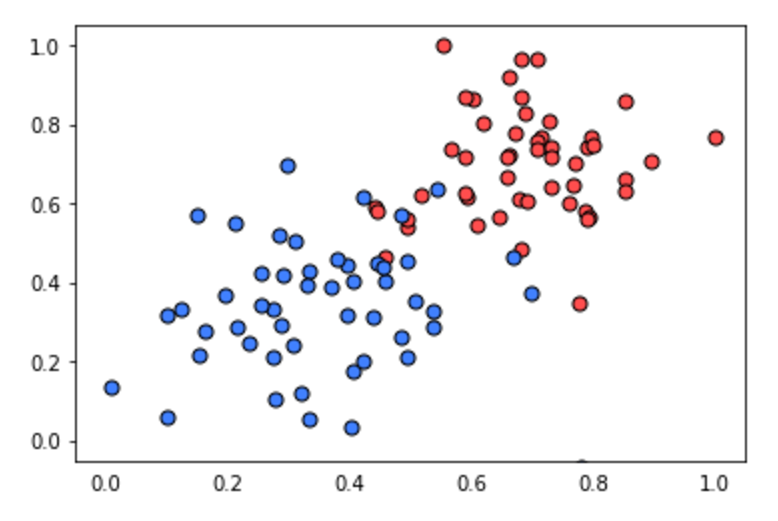

### Pseudocode for the perceptron algorithm

1. We start with random weights, w1 up to wn and b. This gives us the question $ wx + b$ , the line, and the positive and negative areas.

1. Now, for every misclassified point with coordinates x1 up to xn, we do the following.

    1. If the prediction was zero, which means the point is a positive point in the negative area, then we'll update the weights as follows:
    
        1. for i equals 1 to n,
      
            1. we change $wi$ , to $$wi + {\alpha} * xi$$, where alpha is the learning rate. In this case, we're using 0.1. Sometimes, we use 0.01 etc. It depends.
           
            1. Then we change the bi as unit to $$ b + \alpha$$  That moves the line closer to the misclassified point.
           
    1.If the prediction was one, which means a point is a negative point in the positive area, then we'll update the weights in a similar way, except we subtract instead of adding. This means
      
        1. for i equals 1 to n,
            1. change $wi$, to $$wi - {\alpha}xi$$
            
            1. change the bi as unit b to $$ b -{\alpha}$$ And now, the line moves closer to our misclassified point.
            
    1.Repeat this step until we get no errors, or until we have a number of error that is small. Or simply we can just say, do the step a thousand times and stop.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

spreadsheet = pd.read_csv('./05-data.csv', delimiter = ',',header=None)
spreadsheet.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


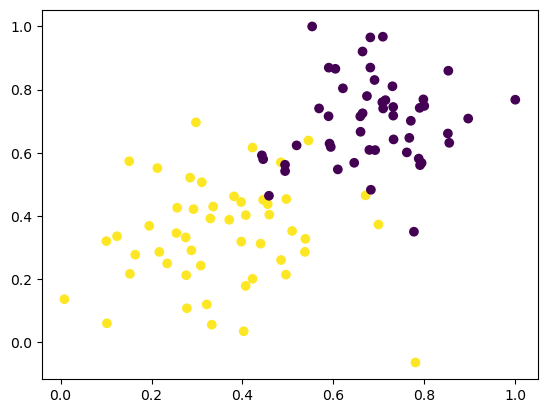

In [45]:
fig, ax = plt.subplots()
ax.scatter(spreadsheet[0],spreadsheet[1],c=spreadsheet[2])
plt.show()

In [64]:
import numpy as np
from matplotlib.pyplot import MultipleLocator
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        error = prediction(X.iloc[i],W,b) - y[i]
        if error == 1:
            W[0] -= X.iloc[i][0]*learn_rate
            W[1] -= X.iloc[i][1]*learn_rate
            b -= learn_rate
        elif error == -1:
            W[0] += X.iloc[i][0]*learn_rate
            W[1] += X.iloc[i][1]*learn_rate
            b += learn_rate
        
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


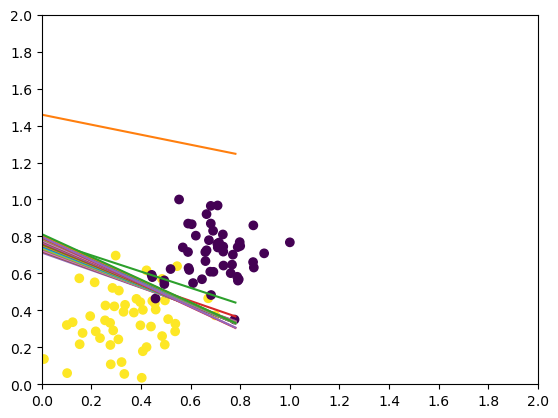

In [81]:
X = spreadsheet.iloc[:,:-1]

y = spreadsheet.iloc[:,-1]

boundary_lines = trainPerceptronAlgorithm(X, y)

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.scatter(spreadsheet[0],spreadsheet[1],c=spreadsheet[2])

plt.xlim(0 ,2)
plt.ylim(0 ,2)

for w,b in boundary_lines:
    x_show = np.hstack((min(X.T[0]), max(X.T[0])))
    y_show = np.hstack((x_min*w + b,  x_max*w + b))
    ax.plot(x_show, y_show)
plt.show()